In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from GetData import O3_BBH, O4_BBH
from sklearn.metrics import r2_score
import pandas as pd

c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_1_source"] = confident["mass1"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_2_source"] = confident["mass2"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:142: SettingWithCopyWarning: 
A value is trying

In [2]:
raw_o4 = pd.read_csv("C:/Users/lucas/GraveTeamMain/Gravitational-Waves-Research-23-24/Data/Wiki_Ligo_O4.csv")
raw_o4 = raw_o4[raw_o4["Luminosity Distance"] != "?"]
raw_o4["Class BH/BH"] = np.array([float(str(c).strip("~")) for c in raw_o4["Class BH/BH"]])

In [3]:
print(raw_o4.shape[0])
raw_o4 = raw_o4[raw_o4["Class BH/BH"] > 0.95]
print(raw_o4.shape[0])

150
109


In [4]:
LD = raw_o4["Luminosity Distance"]
raw_o4["Luminosity Distance Error"] = np.array([float(str(d).split("±")[1]) for d in LD])
raw_o4["Luminosity Distance"] = np.array([float(str(d).split("±")[0]) for d in LD])

In [5]:
overlap = 0.0
values = np.zeros(len(O4_BBH["M_tot"]))
values2 = np.zeros(len(O4_BBH["M_tot"]))
count = len(raw_o4["Luminosity Distance"])
for i, name in enumerate(raw_o4["GW event"].to_numpy()):
    for j, id in enumerate(O4_BBH["eventid"].to_numpy()):
        if id == name:
            values[j] = raw_o4["Luminosity Distance"].to_numpy()[i]
            values2[j] = raw_o4["Luminosity Distance Error"].to_numpy()[i]
            overlap += 1
            break

print(int(overlap), overlap / count)
O4_BBH["luminosity_distance"] = values
O4_BBH["luminosity_distance_error"] = values2

O4_BBH = O4_BBH[(O4_BBH["luminosity_distance"] > 0) & (O4_BBH['chirp_mass'] < 140)]

62 0.5688073394495413


C:\Users\lucas\AppData\Local\Temp\ipykernel_15872\3017186940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O4_BBH["luminosity_distance"] = values
C:\Users\lucas\AppData\Local\Temp\ipykernel_15872\3017186940.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O4_BBH["luminosity_distance_error"] = values2


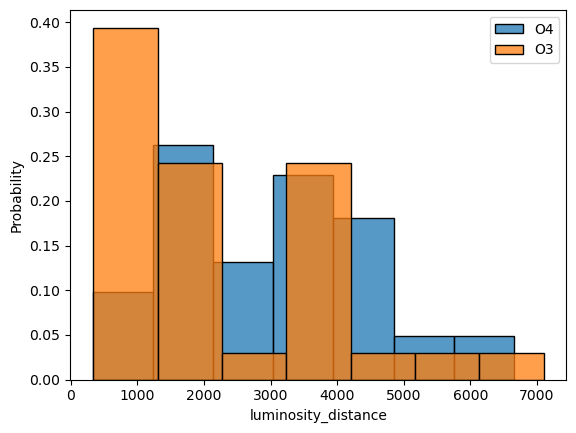

In [6]:
sns.histplot(O4_BBH, x="luminosity_distance", stat="probability", label="O4")
sns.histplot(O3_BBH, x="luminosity_distance", stat="probability", label="O3")
plt.legend()
plt.show()

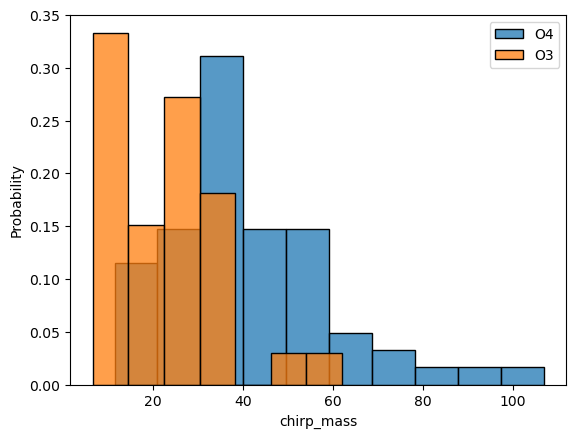

In [7]:
sns.histplot(O4_BBH, x="chirp_mass", stat="probability", label="O4")
sns.histplot(O3_BBH, x="chirp_mass", stat="probability", label="O3")
plt.legend()
plt.show()

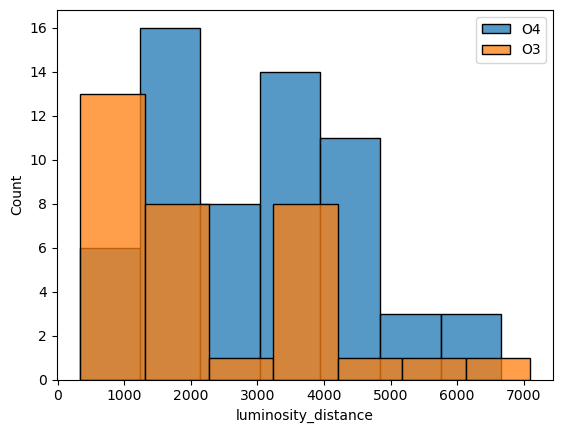

In [8]:
sns.histplot(O4_BBH, x="luminosity_distance", stat="count", label="O4")
sns.histplot(O3_BBH, x="luminosity_distance", stat="count", label="O3")
plt.legend()
plt.show()

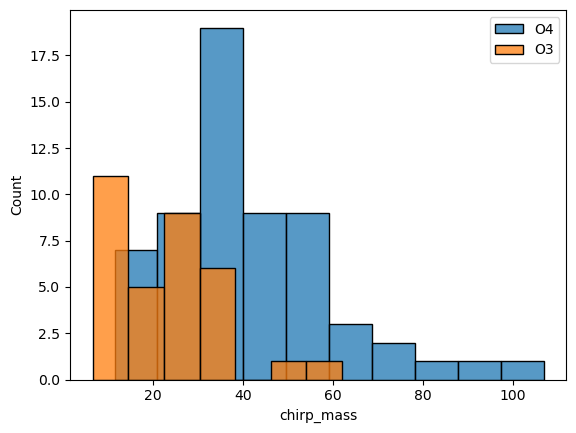

In [9]:
sns.histplot(O4_BBH, x="chirp_mass", stat="count", label="O4")
sns.histplot(O3_BBH, x="chirp_mass", stat="count", label="O3")
plt.legend()
plt.show()

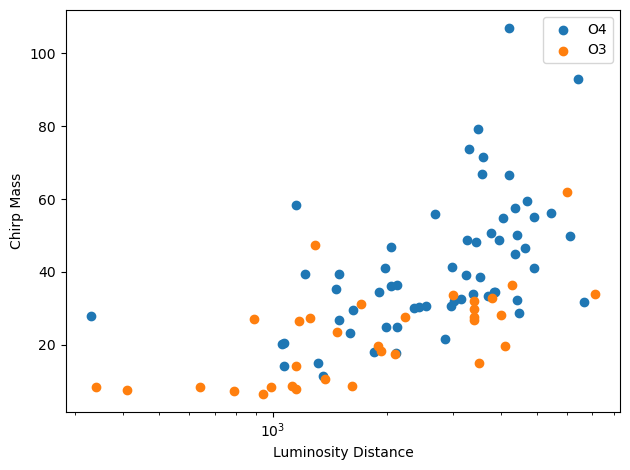

In [10]:
plt.scatter(O4_BBH["luminosity_distance"], O4_BBH["chirp_mass"], label="O4")
plt.scatter(O3_BBH["luminosity_distance"], O3_BBH["chirp_mass"], label="O3")
plt.legend()
plt.xscale("log")
plt.xlabel("Luminosity Distance")
plt.ylabel("Chirp Mass")
#plt.colorbar()
plt.tight_layout()
plt.show()

In [11]:
m = 0.8003270810708438
b = 7.534448682703253
SNR_scale_factor = 1.6

predicted_luminosity_distances = m * np.log(O4_BBH["chirp_mass"]) - np.log(O4_BBH["snr"] * SNR_scale_factor) + b

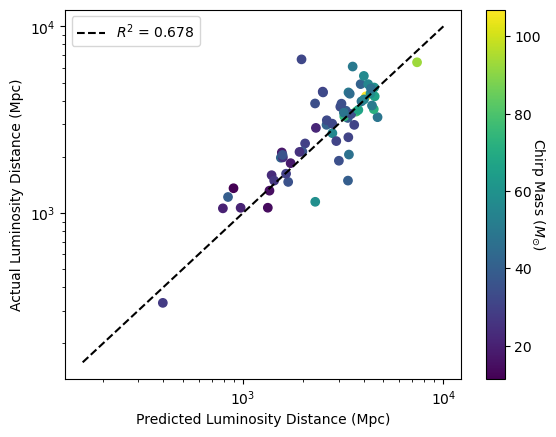

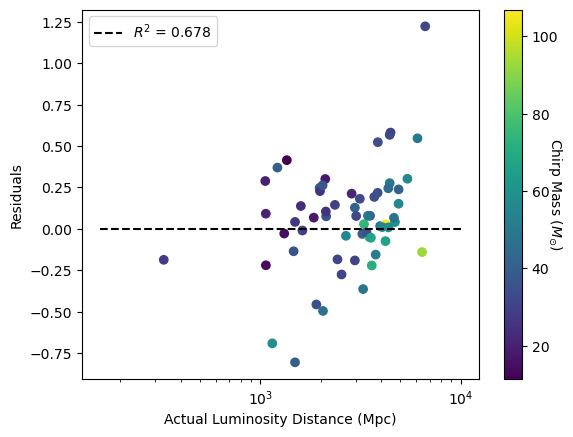

In [12]:
color_name = "chirp_mass"
color_label = "Chirp Mass ($M_{\odot}$)"

#color_name = "snr"
#color_label = "SNR"

#plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["luminosity_distance"]), predicted_luminosity_distances)))
x = np.logspace(2.2, 4, 10)
plt.plot(x, x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O4_BBH["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(np.exp(predicted_luminosity_distances), O4_BBH["luminosity_distance"], c = O4_BBH[color_name])
plt.legend()
cbar = plt.colorbar()
cbar.ax.set_ylabel(color_label, rotation=270)
plt.ylabel("Actual Luminosity Distance (Mpc)")
plt.xlabel("Predicted Luminosity Distance (Mpc)")
plt.yscale("log")
plt.xscale("log")
plt.show()

x = np.logspace(2.2, 4, 10)
plt.plot(x, np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O4_BBH["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(O4_BBH["luminosity_distance"], np.log(O4_BBH["luminosity_distance"]) - predicted_luminosity_distances, c = O4_BBH[color_name])
plt.legend()
cbar = plt.colorbar()
cbar.ax.set_ylabel(color_label, rotation=270)
plt.ylabel("Residuals")
plt.xlabel("Actual Luminosity Distance (Mpc)")
plt.xscale("log")